In [6]:
import pandas as pd

df = pd.read_csv('./data/Funytoin_data.csv')
df.head()

,ID,TIME,DV,AMT,ADM,WT,SEX
0,1,0.00,3.07,150,2,57.93,1
1,1,2.18,2.99,.,2,57.93,1
2,1,4.41,2.68,.,2,57.93,1
3,1,8.65,1.29,.,2,57.93,1
4,1,10.42,1.52,.,2,57.93,1


# Overview

## Data Summary

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      576 non-null    int64  
 1   TIME    576 non-null    float64
 2   DV      576 non-null    float64
 3   AMT     576 non-null    object 
 4   ADM     576 non-null    int64  
 5   WT      576 non-null    float64
 6   SEX     576 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 31.6+ KB


In [40]:
df.describe(include='all')

,ID,TIME,DV,AMT,ADM,WT,SEX
count,576.00000,576.000000,576.000000,576,576.000000,576.000000,576.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,.,NaN,NaN,NaN
freq,NaN,NaN,NaN,512,NaN,NaN,NaN
mean,32.50000,10.590226,0.839288,NaN,1.500000,66.415312,0.546875
std,18.48901,7.891785,0.716740,NaN,0.500435,9.790091,0.498231
min,1.00000,0.000000,0.000000,NaN,1.000000,46.540000,0.000000
25%,16.75000,3.735000,0.297500,NaN,1.000000,60.050000,0.000000
50%,32.50000,9.900000,0.655000,NaN,1.500000,64.645000,1.000000
75%,48.25000,16.772500,1.110000,NaN,2.000000,70.815000,1.000000


## Number of Patients

In [7]:
num_patients = df['ID'].nunique()
print(f'Number of unique patients: {num_patients}')

Number of unique patients: 64


## Sex Distribution

In [12]:
import matplotlib.pyplot as plt
grouped_by_sex = df.groupby('SEX').count()['ID']
grouped_by_sex

SEX
0    261
1    315
Name: ID, dtype: int64

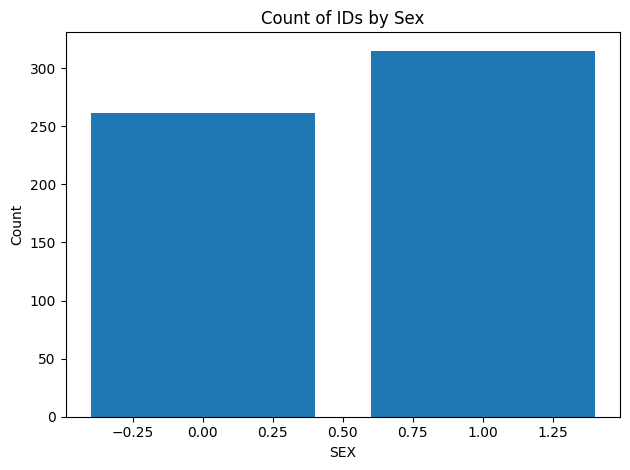

In [38]:
plt.figure()
plt.bar(grouped_by_sex.index, grouped_by_sex.values)
plt.xlabel('SEX')
plt.ylabel('Count')
plt.title('Count of IDs by Sex')
plt.tight_layout()
plt.show()

##  Distribution of Weight

In [44]:
grouped_by_weight = df.groupby('ID')['WT'].mean()
grouped_by_weight

ID
1     57.93
2     72.77
3     80.84
4     46.54
5     74.29
      ...  
60    58.42
61    76.57
62    95.49
63    69.65
64    63.30
Name: WT, Length: 64, dtype: float64

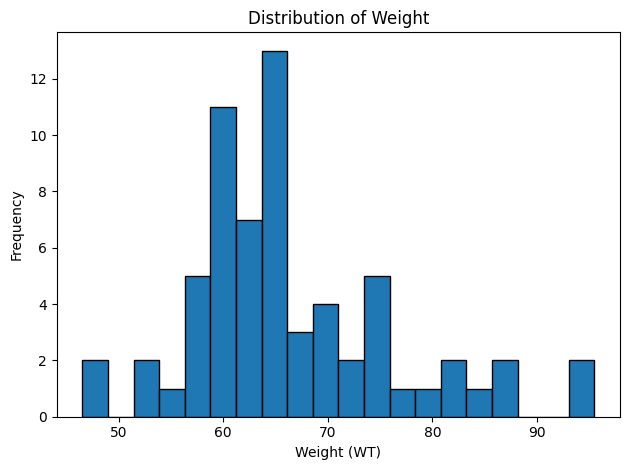

In [45]:
plt.figure()
plt.hist(grouped_by_weight, bins=20, edgecolor='black')
plt.xlabel('Weight (WT)')
plt.ylabel('Frequency')
plt.title('Distribution of Weight')
plt.tight_layout()
plt.show()

## Sex vs Weight boxplot

In [47]:
grouped_by_sex_and_weight = df.groupby('ID').agg({'SEX':'first', 'WT':'first'})
grouped_by_sex_and_weight

,SEX,WT
ID,,
1,1,57.93
2,1,72.77
3,0,80.84
4,0,46.54
5,1,74.29
...,...,...
60,1,58.42
61,0,76.57
62,1,95.49


<Figure size 640x480 with 0 Axes>

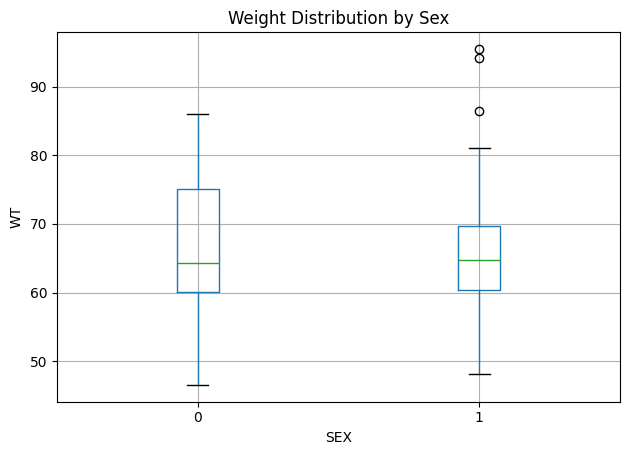

In [53]:
plt.figure()
grouped_by_sex_and_weight.boxplot(column='WT', by='SEX')

plt.xlabel('SEX')
plt.ylabel('WT')
plt.title('Weight Distribution by Sex')
plt.suptitle('')  # removes automatic matplotlib subtitle
plt.tight_layout()
plt.show()

## Datapoints per Patient

In [54]:
datapoints_per_patient = df.groupby('ID').size()
datapoints_per_patient

ID
1     9
2     9
3     9
4     9
5     9
     ..
60    9
61    9
62    9
63    9
64    9
Length: 64, dtype: int64